# Neural networks in pytorch

This notebook explores fitting a one-input, one-output, single-hidden layer neural-network by gradient descent, using automatic differentiation in pytorch.  It is intended to help me understand how neural networks work.  I would to gradually build it up to working with MNIST and transformers.

With a wide hidden layer you can clearly see the function approach a gaussian process.  It's pretty cool!

The problem is essentially to find a network of an appropriate arhcitecture and complexity and efficiently find parameters that are close to globally optimal.

The model can get stuck in a local optimum, where the gradient is close to zero, but the loss is still high.  The things that effect it are:
- hidden layer width
- parameter initialisation
- learning rate

What is the best way to do optimise these features?

### Hidden layer width (and network depth?)

Layer width trades off the flexibility and computational cost of the function.  It should be wide enough to fit the target function but not much wider as that is computationally inefficient.  Excess width also allows over-fitting, but it is better to control this with early-stopping and regularisation using validation sets.

This should largely apply to network depth as well, except that the ratio of width to depth is also supposed to matter according to that Principles of DL theory book.

### Parameter intialisation

This is the prior on the initial function.  The obvious strategy is to standardise the data and set a reasonable prior on that basis.  It might be good just to write the math for a simple case.

### Learning rate

Learning rate should be lower when number of parameters and batch size is higher.

There are learning rate finding algorithms, the idea is fairly obvious.  Try a few and choose the ones that decrease the loss most quickly.

**It might be good to go and check some resources and start taking notes on what people are actually doing before I go much further here.**

It would be cool to implement validation and early stopping, and automatically decrease the learning rate when the training loss increases.

## Neural network with single hidden layer fitted by gradient descent

In [1]:
# Packages
import torch
import matplotlib.pyplot as plt

In [2]:
# Initialise parameters.  Number of hidden neurons, and weights and biases for hidden layer and output
def ip(n_h):
    n_h = n_h
    W1 = torch.randn((1, n_h), requires_grad=True)
    b1 = torch.randn((1, n_h), requires_grad=True)
    W2 = torch.randn((n_h, 1), requires_grad=True)
    b2 = torch.randn((1, 1), requires_grad=True)
    return n_h, W1, b1, W2, b2

In [3]:
# Plot data, hidden laer neuron outputs, and network predictions
def plot_net(ax, x, y, n_h, h, preds, title):
    ax.scatter(x, y, alpha=0.2)
    for i in range(n_h):
        ax.plot(x, h[:, i].detach(), alpha=0.1, color='grey')
    ax.plot(x, preds.detach())
    ax.set_title(title)

In [15]:
# Perform gradient descent, plotting network outputs before and after, and training loss
def net_gd(n_h, W1, b1, W2, b2, lr, hist):
#     Initial predictions
    h = torch.max(torch.zeros((100, n_h)), x @ W1 + b1)
    preds = h @ W2 + b2
    
#     Plot initial predictions
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    plot_net(ax1, x, y, n_h, h, preds, "Initial outputs")

#     Run gradient descent
    for i in range(100):
#         Find loss and gradient
        loss = torch.mean(torch.abs(y - preds))
        hist.append(loss.detach())
        loss.backward(inputs = (W1, b1, W2, b2))
        
#         Update parameters
        W1 = W1 - lr * W1.grad
        b1 = b1 - lr * b1.grad
        W2 = W2 - lr * W2.grad
        b2 = b2 - lr * b2.grad
        
#         New predictions
        h = torch.max(torch.zeros((100, n_h)), x @ W1 + b1)
        preds = h @ W2 + b2
        
#     Plot loss history and final predictions
    ax2.plot(hist)
    ax2.set_title(f"Training loss for lr = {lr}")
    plot_net(ax3, x, y, n_h, h, preds, "Final outputs")
    
    return W1, b1, W2, b2, hist

## Learning a linear function

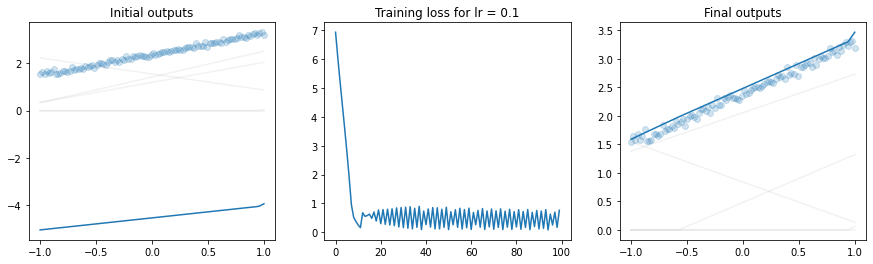

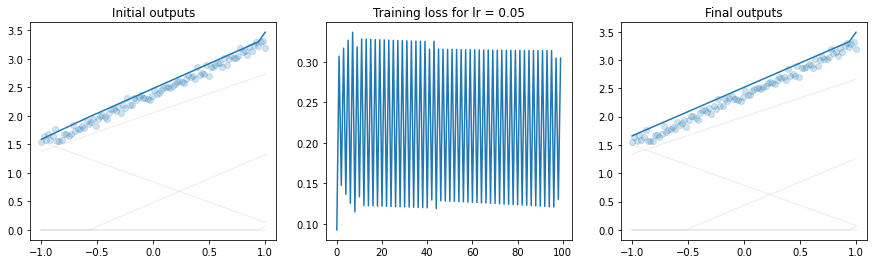

In [16]:
# Data
x = torch.linspace(-1, 1, 100).reshape(100, 1)
y = torch.randn(1) * x + torch.randn(1) + torch.randn(x.shape) * 0.05

# Initialise parameters
n_h, W1, b1, W2, b2 = ip(5)

# Perform gradient descent
W1, b1, W2, b2, hist = net_gd(n_h, W1, b1, W2, b2, lr=0.1, hist=[])
W1, b1, W2, b2, hist = net_gd(n_h, W1, b1, W2, b2, lr=0.05, hist=[])

## Learning a quadratic function

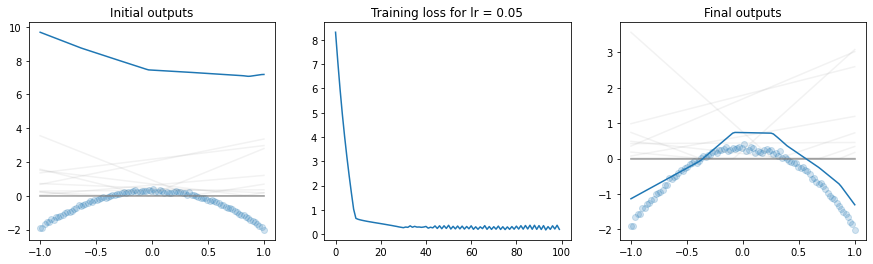

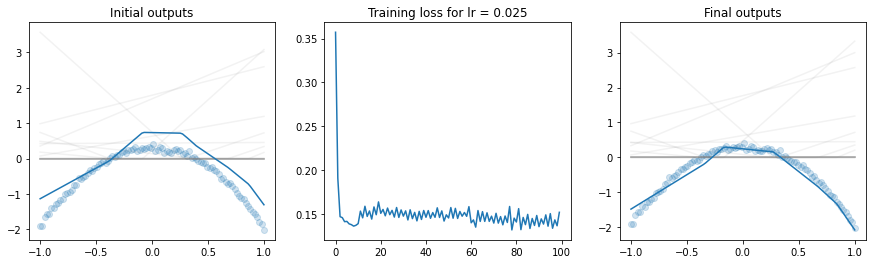

In [6]:
# Data
x = torch.linspace(-1, 1, 100).reshape(100, 1)
y = torch.randn(1) * x**2 + torch.rand(1) + torch.randn(x.shape) * 0.05

# Initialise parameters
n_h, W1, b1, W2, b2 = ip(20)

# Perform gradient descent
W1, b1, W2, b2, hist = net_gd(n_h, W1, b1, W2, b2, lr=0.05, hist=[])
W1, b1, W2, b2, hist = net_gd(n_h, W1, b1, W2, b2, lr=0.025, hist=[])

## Learning a sinusoidal function

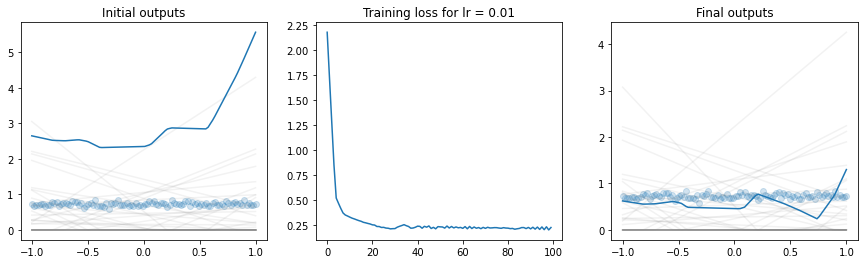

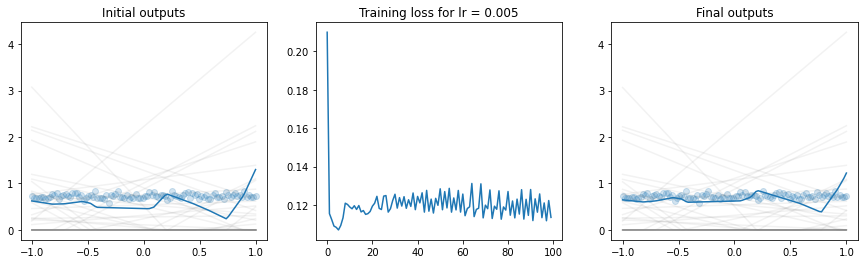

In [7]:
# Data
x = torch.linspace(-1, 1, 100).reshape(100, 1)
y = torch.rand(1) * torch.sin(torch.pi * x) + torch.rand(1) + torch.randn(x.shape) * 0.05

# Initialise parameters
n_h, W1, b1, W2, b2 = ip(40)

# Perform gradient descent
W1, b1, W2, b2, hist = net_gd(n_h, W1, b1, W2, b2, lr=0.01, hist=[])
W1, b1, W2, b2, hist = net_gd(n_h, W1, b1, W2, b2, lr=0.005, hist=[])

In [8]:
W1.grad

C:\Users\rasut\anaconda3\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad
